In [2]:
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sn
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# def IsRetinopathy(grade):
#     return 1 if grade>0 else 0

In [31]:
def get_pixel_values(image_path,resize_shape=(200, 200)):
    img = cv2.imread(image_path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_image, resize_shape)
    return resized_img

In [32]:
df = pd.read_csv("./training.csv")
x_test_list =[]
test_df = pd.read_csv("./test.csv")

In [33]:
test_df=test_df.iloc[:,:2]
df = df.iloc[:,:2]

In [7]:
# df["binary"]=df["Retinopathy grade"].apply(lambda x: IsRetinopathy(x))
# test_df["binary"]=test_df["Retinopathy grade"].apply(lambda x: IsRetinopathy(x))

In [39]:
frequency_counts = df["Retinopathy grade"].value_counts()
test_frequency_counts = test_df["Retinopathy grade"].value_counts()



In [ ]:

# bin_freq = df["binary"].value_counts()
# test_bin_freq = test_df["binary"].value_counts()
  

In [41]:
df_pixel_values = pd.DataFrame()
test_df_pixel_values = pd.DataFrame()
pixel_values_list =[]
pixel_values_list_2d =[]
pixel_values_list_2d_rotated =[]
labels_rotated_train =[]
labels_rotated_test =[]
test_pixel_values_list =[]
test_pixel_values_list_2d =[]
test_pixel_values_list_2d_rotated =[]
#creating separate df for images name
images_name = df['Image name']
test_images_name = test_df['Image name']

In [42]:
y_test = test_df["Retinopathy grade"]
y_train  = df["Retinopathy grade"]

In [43]:
for image in images_name:
    print("train doing for ",image)
    image_path=f"./1. Original Images/a. Training Set/{image}.jpg"
    temp_pixel_values=get_pixel_values(image_path)
    pixel_values_list_2d.append(temp_pixel_values)
    pixel_values_list.append(temp_pixel_values.flatten())


train doing for  IDRiD_001
train doing for  IDRiD_002
train doing for  IDRiD_003
train doing for  IDRiD_004
train doing for  IDRiD_005
train doing for  IDRiD_006
train doing for  IDRiD_007
train doing for  IDRiD_008
train doing for  IDRiD_009
train doing for  IDRiD_010
train doing for  IDRiD_011
train doing for  IDRiD_012
train doing for  IDRiD_013
train doing for  IDRiD_014
train doing for  IDRiD_015
train doing for  IDRiD_016
train doing for  IDRiD_017
train doing for  IDRiD_018
train doing for  IDRiD_019
train doing for  IDRiD_020
train doing for  IDRiD_021
train doing for  IDRiD_022
train doing for  IDRiD_023
train doing for  IDRiD_024
train doing for  IDRiD_025
train doing for  IDRiD_026
train doing for  IDRiD_027
train doing for  IDRiD_028
train doing for  IDRiD_029
train doing for  IDRiD_030
train doing for  IDRiD_031
train doing for  IDRiD_032
train doing for  IDRiD_033
train doing for  IDRiD_034
train doing for  IDRiD_035
train doing for  IDRiD_036
train doing for  IDRiD_037
t

In [44]:
for image in test_images_name:
    print("test for image",image)
    image_path=f"./1. Original Images/b. Testing Set/{image}.jpg"
    temp_pixel_values=get_pixel_values(image_path)
    test_pixel_values_list_2d.append(temp_pixel_values)
    test_pixel_values_list.append(temp_pixel_values.flatten())


test for image IDRiD_001
test for image IDRiD_002
test for image IDRiD_003
test for image IDRiD_004
test for image IDRiD_005
test for image IDRiD_006
test for image IDRiD_007
test for image IDRiD_008
test for image IDRiD_009
test for image IDRiD_010
test for image IDRiD_011
test for image IDRiD_012
test for image IDRiD_013
test for image IDRiD_014
test for image IDRiD_015
test for image IDRiD_016
test for image IDRiD_017
test for image IDRiD_018
test for image IDRiD_019
test for image IDRiD_020
test for image IDRiD_021
test for image IDRiD_022
test for image IDRiD_023
test for image IDRiD_024
test for image IDRiD_025
test for image IDRiD_026
test for image IDRiD_027
test for image IDRiD_028
test for image IDRiD_029
test for image IDRiD_030
test for image IDRiD_031
test for image IDRiD_032
test for image IDRiD_033
test for image IDRiD_034
test for image IDRiD_035
test for image IDRiD_036
test for image IDRiD_037
test for image IDRiD_038
test for image IDRiD_039
test for image IDRiD_040


In [45]:
df_pixel_values = pd.DataFrame(pixel_values_list)
df_pixel_values_2d = np.array(pixel_values_list_2d)
test_df_pixel_values=pd.DataFrame(test_pixel_values_list)
test_df_pixel_values_2d=np.array(test_pixel_values_list_2d)
len(pixel_values_list)
df_pixel_values.shape
df_pixel_values_2d[0].shape

(200, 200)

In [15]:

X_train = df_pixel_values
X_train_2d = df_pixel_values_2d


x_test = test_df_pixel_values
x_test_2d= test_df_pixel_values_2d

X_train=X_train/255
x_test = x_test/255

In [16]:
X_train_2d.shape

(413, 200, 200)

In [17]:
rotation_angles = [90, 180, 270] 

In [18]:
for image, label in zip(X_train_2d, y_train):
    pixel_values_list_2d_rotated.append(image)
    labels_rotated_train.append(label)
    for angle in rotation_angles:
        rotated_image = Image.fromarray(image)
        rotated_image = rotated_image.rotate(angle)
        pixel_values_list_2d_rotated.append(np.array(rotated_image))
        labels_rotated_train.append(label)


In [19]:
for image, label in zip(x_test_2d, y_test):
    test_pixel_values_list_2d_rotated.append(image)
    labels_rotated_test.append(label)
    for angle in rotation_angles:
        rotated_image = Image.fromarray(image)
        rotated_image = rotated_image.rotate(angle)
        test_pixel_values_list_2d_rotated.append(np.array(rotated_image))
        labels_rotated_test.append(label)

In [20]:
pixel_values_list_2d_rotated = np.array(pixel_values_list_2d_rotated)
labels_rotated_train=np.array(labels_rotated_train)

In [21]:
pixel_values_list_2d_rotated.shape

(1652, 200, 200)

In [25]:
model = keras.Sequential([
   # Reshape to match the expected 4D shape
    keras.layers.Conv2D(20, (5, 5), activation="relu", input_shape=(200,200,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(40, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(40, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(pixel_values_list_2d_rotated,labels_rotated_train,epochs=10)
ypred= model.predict(x_test_2d)
# print("yrped",ypred)
yrpedbin=[]




Epoch 1/10
52/52 [==============================] - 48s 908ms/step - loss: 9.5487 - accuracy: 0.6192
Epoch 2/10
52/52 [==============================] - 44s 850ms/step - loss: 0.6063 - accuracy: 0.6683
Epoch 3/10
52/52 [==============================] - 43s 826ms/step - loss: 0.5840 - accuracy: 0.6755
Epoch 4/10
52/52 [==============================] - 39s 757ms/step - loss: 0.5745 - accuracy: 0.6707
Epoch 5/10
52/52 [==============================] - 39s 753ms/step - loss: 0.5713 - accuracy: 0.7004
Epoch 6/10
52/52 [==============================] - 40s 764ms/step - loss: 0.5733 - accuracy: 0.6907
Epoch 7/10
52/52 [==============================] - 39s 743ms/step - loss: 0.5616 - accuracy: 0.6846
Epoch 8/10
52/52 [==============================] - 39s 744ms/step - loss: 0.5742 - accuracy: 0.6925
Epoch 9/10
52/52 [==============================] - 45s 859ms/step - loss: 0.5594 - accuracy: 0.7082
Epoch 10/10
4/4 [==============================] - 1s 113ms/step


In [26]:
for pred in ypred:
    yrpedbin.append(np.argmax(pred))
print("bin",yrpedbin)
accuracy = accuracy_score(y_test, yrpedbin)
classification_report_str = classification_report(y_test, yrpedbin)

bin [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
print("neural network ")
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report_str)

neural network 
Accuracy: 0.6407766990291263

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.03      0.05        34
           1       0.66      0.94      0.78        69

    accuracy                           0.64       103
   macro avg       0.43      0.49      0.41       103
weighted avg       0.51      0.64      0.54       103



In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=yrpedbin)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1, 33],
       [ 4, 65]])>

Text(95.72222222222221, 0.5, 'truth')

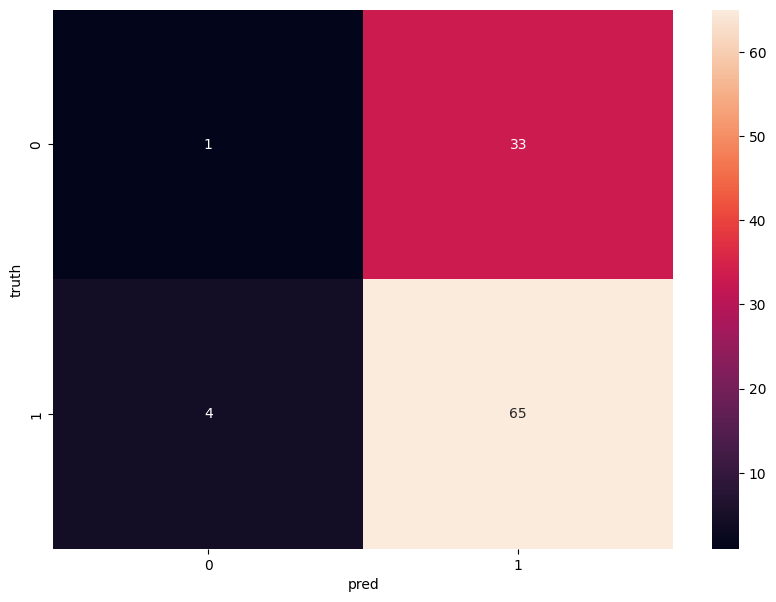

In [29]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("pred")
plt.ylabel("truth")